In [1]:
import sys
import re, os, path, csv
import glob

import numpy as np
import pandas as pd
from numpy import fft

import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
from numpy import fft
from larch import io, Interpreter
mylarch = Interpreter()

sys.path.insert(0, r'C:\Users\shadd\OneDrive\Documents\Python\frxas.py')

from frxas import time_domain, models, hdf5_io
import dynamic_XAS_visualization as dxas

%reload_ext autoreload
%autoreload 2

In [2]:
direc = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\'
match_str = 'E*_EtaAlign_Ir.h5'
match_str_eta = 'E*_EtaAlign_Eta.h5'
all_files = glob.glob(os.path.join(direc,match_str))
all_files.sort(key=lambda file:int(file.split('\\E')[-1].split('_E')[0]))

all_files_eta = glob.glob(os.path.join(direc,match_str_eta))
all_files_eta.sort(key=lambda file:int(file.split('\\E')[-1].split('_E')[0]))

In [3]:
models_Ir, models_Eta = [], []
for file, file_eta in zip(all_files, all_files_eta):
    models_Ir.append(hdf5_io.load_time_domain_fit(file[:-3]))
    models_Eta.append(hdf5_io.load_time_domain_fit(file_eta[:-3]))
meta = np.genfromtxt('..\\Feb2018 Data Fits\\Energy Spectrum_1Hz\\Energies_Iravgs.csv', delimiter=',',skip_header=1)
energies = meta[:,1]
Ir_avgs = meta[:,2]

In [4]:
models_Ir[83]

In [5]:
Irs, Etas, Ir_actual = [], [], []
for model_Ir, model_Eta, Ir_avg in zip(models_Ir, models_Eta, Ir_avgs):
    Ns = int(model_Ir.ndata/2)
    dt = 1/(model_Ir.userkws['frequencies'][0]*-2)
    freq_in = model_Ir.userkws['freq_in']
    b = model_Ir.userkws['window_param']
    ti = np.linspace(0, dt*(Ns-1),num=Ns)
    Ns_wfm = int(1/freq_in/dt)
    Ir = fft.ifft(fft.ifftshift(model_Ir.eval()*(Ns*np.pi)))
    Eta = fft.ifft(fft.ifftshift(model_Eta.eval()*(Ns*np.pi)))
    window = time_domain.gauss_window(np.ones(Ns), freq_in, ti, b)
    ti = ti[:Ns_wfm]
    Irs.append(Ir[:Ns_wfm]/window[:Ns_wfm])
    Etas.append(Eta[:Ns_wfm]/window[:Ns_wfm])
    Ir_actual.append(Ir[:Ns_wfm]/window[:Ns_wfm] + Ir_avg)
Irs = np.array(Irs)
Etas = np.array(Etas)
Ir_actual = np.array(Ir_actual)

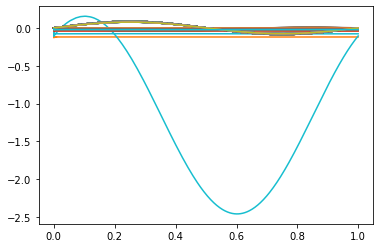

In [8]:
_, ax = plt.subplots()
maxes=[]
for (eta, Ir) in zip(Etas[:,:], Irs[:,:]):
    maxes.append(np.max(eta.real))
    ax.plot(ti, eta.real)
    ax.plot(ti, Ir.real)    

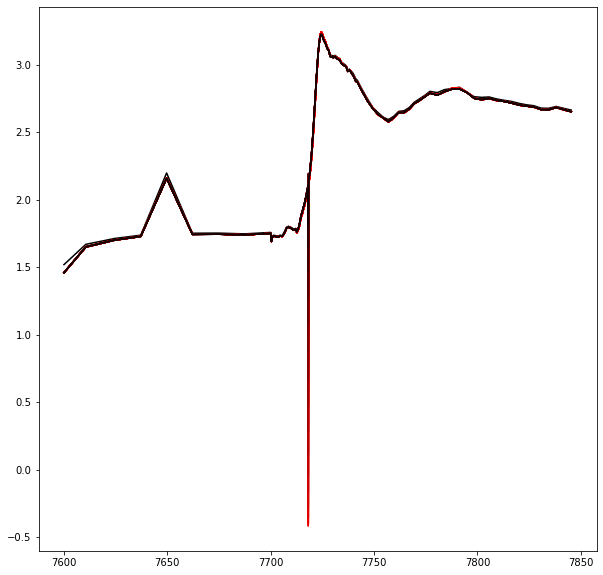

In [9]:
_, ax1 = plt.subplots( figsize=(10,10))

for i in range(0, 40):
    ax1.plot(energies, Ir_actual[:,i*50].real, color=dxas.colorfun(Etas[0,i*25].real,np.max(np.abs(Etas[0,:].real))))
# ax1.set_xlim(7718, 7721)
# ax1.set_ylim(2.3,2.48)

In [24]:
ddfa = '7637.2 7649.699 7662.199 7687.331 7700.01  7700.388 7700.719 7701.071 7701.434 7701.798 7702.155 7702.515 7702.879 7703.242 7703.6   7703.961 7704.325 7704.687 7705.02  7705.381 7705.749 7706.112 7706.471 7706.831 7707.196 7707.557 7707.915 7708.28  7708.646 7708.982 7709.29  7709.596 7709.903 7710.211 7710.514 7710.823 7711.108 7711.416 7711.725 7712.029 7712.333 7712.644 7712.953 7713.235 7713.538 7713.853 7714.161 7714.47 7714.777 7715.077 7715.386 7715.67  7715.972 7716.137 7716.255 7716.367 7716.499 7716.62  7716.733 7716.867 7716.988 7717.101 7717.233 7717.35 7717.462 7717.592 7717.71  7717.842 7717.96  7718.074 7718.206 7718.328 7718.441 7718.573 7718.693 7718.805 7718.936 7719.056 7719.168 7719.299 7719.42  7719.535 7719.666 7719.788 7719.901 7720.034 7720.154 7720.267 7720.397 7720.516 7720.646 7720.766 7720.879 7721.013 7721.133 7721.246 7721.379 7721.5   7721.612 7721.744 7721.862 7721.974 7722.104 7722.226 7722.358 7722.479 7722.593 7722.724 7722.846 7722.958 7723.051 7723.213 7723.406 7723.603 7723.8   7724.    7724.198 7724.396 7724.592 7724.789 7725.008 7725.723 7726.507 7727.302 7728.066 7728.83  7729.593 7730.353 7731.147 7731.91  7732.679 7733.441 7734.214 7734.976 7735.775 7736.539 7737.309 7738.078 7738.844 7739.616 7740.388 7741.161 7741.952 7744.452 7746.969 7749.453 7751.935 7754.455 7756.949 7759.43  7761.947 7764.468 7766.965 7769.462 7771.987 7774.488 7776.997 7780.562 7784.149 7787.693 7791.282 7794.862 7798.436 7802.015 7805.614 7809.204 7812.809 7816.381 7819.994 7823.605 7827.223 7830.814 7834.438 7838.06'

In [35]:
energy1 = [float(ener) for ener in ddfa.split(' ') if len(ener)>0]

In [47]:
for i, energy in enumerate(energies):
    print(i, energy, remove_energies)

0 7600.067 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
1 7610.641 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
2 7624.556 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
3 7637.2 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
4 7649.699 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
5 7662.199 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
6 7674.733 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
7 7687.331 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
8 7700.01 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
9 7700.388 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
10 7700.719 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
11 7701.071 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
12 7701.434 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
13 7701.798 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
14 7702.155 [7600.02, 7610.86, 7624.34, 7649.5, 7700.38, 7718.2]
15 7702.515 [7600.02, 7610.86, 7624.34

In [10]:
# remove: 7600.02, 7610.86, 7624.34, 7649.50, 7700.38, 7718.20
deglitch = [0,1,2,4,5,6,8,9,11,12,13,74]
energies[deglitch]
deglitch_mask = np.ones((len(energies)),dtype=bool)
deglitch_mask[:] = True
deglitch_mask[deglitch] = False

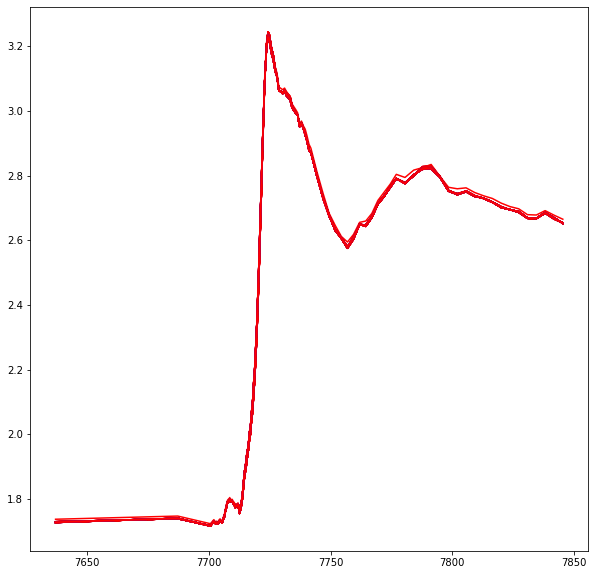

In [11]:
_, ax1 = plt.subplots( figsize=(10,10))
step = 20

for i, (Ir, eta) in enumerate(zip(Ir_actual[deglitch_mask, ::step].T, Etas[deglitch_mask,0].T)):
#     print(Ir.shape, eta.shape)
    ax1.plot(energies[deglitch_mask], Ir, color=dxas.colorfun(eta.real,np.max(np.abs(eta.real))))
# ax1.set_xlim(7718, 7721)
# ax1.set_ylim(2.3,2.48)

In [12]:
direc = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\Raw_All_Eta\\'
for i, (Ir,eta) in enumerate(zip(Ir_actual[deglitch_mask].T,Etas[0])):
    
    svname = direc + f'{i} Eta {eta.real*1000:.2f} mV.txt'
    svdat = np.concatenate((energies[deglitch_mask, None], Ir[None].T.real), axis=1)
#     print(svname, svdat.shape)
    np.savetxt(svname, svdat, delimiter='\t', fmt='%.8e')

In [13]:
dir_path = 'C:/Users/shadd/OneDrive/Documents/Python/Xray-project/fr_XAS/Feb2018 Data Fits/1 Hz XANES by Eta/Raw_All_Eta/'
all_files = glob.glob(dir_path + '*Eta*')
all_files.sort(key=lambda file: int(file.split('\\')[-1].split(' Eta')[0]))

In [14]:
ath_prj = io.create_athena(r'1_Hz_all_eta.prj', _larch=mylarch)
for file in all_files:
    ath_prj.add_group(dxas.larch_xafs_normalization(file))
    
ath_prj.save()

In [15]:
norm_prj = io.read_athena(r'1_Hz_all_eta.prj', _larch=mylarch)

In [16]:
energies, mus, Ir_larch, Eta_larch = [], [], [], []
for name, group in norm_prj._athena_groups.items():
    energies.append(group.energy)
    Ir_larch.append(group.norm)
    Eta_larch.append(dxas.group_name_to_eta(name))
    mus.append(group.mu)

energies = dxas.transpose_list(energies)
Ir_larch = dxas.transpose_list(Ir_larch)
Eta_larch = dxas.transpose_list(Eta_larch) / 1000
mus = dxas.transpose_list(mus)

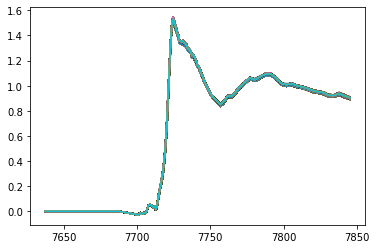

In [17]:
fig, ax = plt.subplots()
ax.plot(energies, Ir_larch)
plt.show()
# ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
# ax.set_xticklabels(['a','a','a'])  # xticks(np.arange(7700, 7800, step=10))

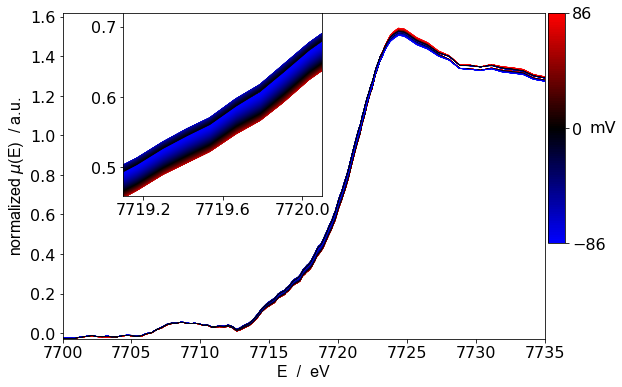

In [22]:
inset_dict = {'start_energy':7719, 'stop_energy':7720.5, 'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.5, 'y1_adj': 0,
                      'y2_adj': -0.05, 'y_interval': 0.06, 'x_lateral': 0.1, 'y_vertical':0}
larch_step = 10
start_eta = 30
fig = dxas.plotXANES(energies[:, 0], Ir_larch[:,::larch_step], Eta_larch[::larch_step], startE=7700,stopE=7735,
               inset_dict=inset_dict, size=(9,6), marker='')
# plt.savefig(r'Plots\\1 Hz XANES Spectra.png', bbox_inches='tight', dpi=400)

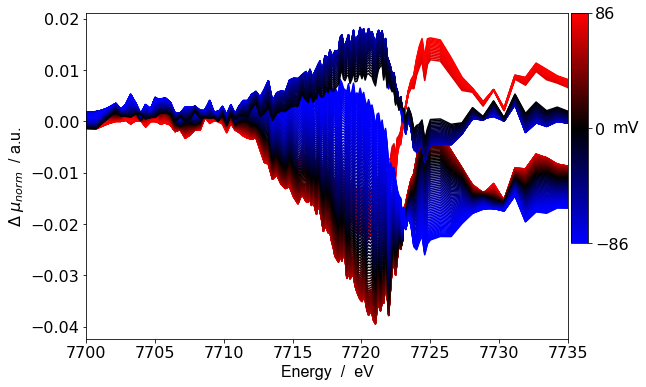

In [23]:
fig = dxas.plot_diffXANES(energies[:,0], Ir_larch, Eta_larch, start_eta, larch_step)

plt.show()

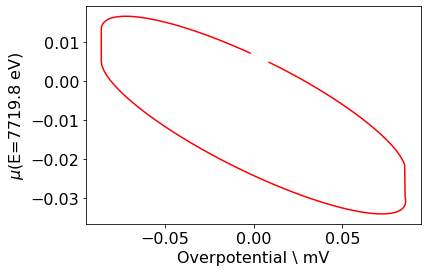

In [50]:
fig = dxas.plot_lissajou(energies, Ir_larch, Eta_larch, plot_e=7719.8, start_eta=3, larch_step=larch_step, color=(1,0,0))
plt.show()

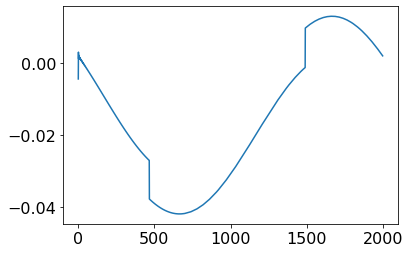

In [47]:
_, ax = plt.subplots()
ax.plot((Ir_larch[83,:]-Ir_larch[83,start_eta]))
# ax.set_xlim(-10,50)

In [42]:
np.argmax((Ir_larch[83,-100:]-Ir_larch[83,start_eta]))

0

## Old/Scratch

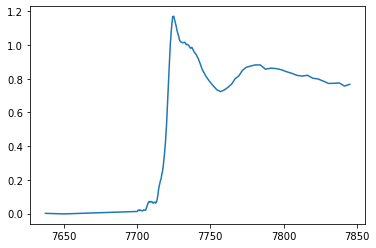

In [10]:
fname = 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\1 Hz XANES by Eta\\0.5 Hz Normalized.csv'

dat = np.array(pd.read_csv(fname, delimiter=',', header=None, skiprows=1))
energies_norm = dat[:,0]
Ir_norm = dat[:,1:]
Eta_norm = -Etas[0,::50].real
Z
fig, ax = plt.subplots()
ax.plot(energies_norm, Ir_norm[:,0])
plt.show()

In [9]:
fname = 'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\Feb2018 Data Fits\\0.5 Hz XANES by Eta\\0.5 Hz Normalized.csv'

dat = np.array(pd.read_csv(fname, delimiter=',', header=None, skiprows=1))
energies_norm = dat[:,0]
Ir_norm = dat[:,1:]
Eta_norm = 

In [12]:
Etas.shape

(180, 2000)

In [10]:
def plotXANES(energies, Irs, Etas, start_eta=0, stop_eta=0, marker='.', inset_dict={},
             startE=7705, stopE=7730, startInE=7718, stopInE=7720, size=(9, 6)):
    if not inset_dict:
        inset_dict = {'x1_adj': 0, 'x2_adj': 0, 'x_interval':0.1, 'y1_adj': 0,
                      'y2_adj': 0, 'y_interval': 0.02, 'x_lateral': 0,
                      'y_vertical':0}
    
    x1_adj = inset_dict['x1_adj']
    x2_adj = inset_dict['x2_adj']
    x_interval = inset_dict['x_interval']
    y1_adj = inset_dict['y1_adj']
    y2_adj = inset_dict['y2_adj']
    y_interval = inset_dict['y_interval']
    x_lat = inset_dict['x_lateral']
    y_vert = inset_dict['y_vertical']

    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal'}
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['legend.fontsize'] = 16
    mpl.rcParams['axes.labelsize'] = 16


    # Finding max and min of Ir across all data sets for setting plot limits
    Ir_abs_max = np.max(Irs)
    Ir_abs_min = np.round(np.min(Ir_norm[np.argwhere(energies>=startE)[0][0], :]), 2)

    # Finding max and min of eta (or voltage) for setting color bar limits
    max_eta = int(round(np.max(Etas) * 1000, 0))
    min_eta = int(round(np.min(Etas) * 1000, 0))

    ## Plotting full XANES spectra
    fig = plt.figure(constrained_layout=False, figsize=size)
    gs = fig.add_gridspec(5, 20)
    f_ax1 = fig.add_subplot(gs[:, :-1])

    for n in range(start_eta, Irs.shape[-1] - stop_eta):
        f_ax1.plot(energies, Irs[:, n], color=colorfun(Etas[n], np.max(Etas)),
                 linestyle='-',linewidth=.3, marker='', markersize=3,
                   label=f'{Etas[n]} mV')

    f_ax1.set(xlim=[startE,stopE], ylim=[.97 * Ir_abs_min, 1.05 * Ir_abs_max])
    f_ax1.set_ylabel(r'Absorption  / a.u.', **title_font)
    f_ax1.set_xlabel(r'Energy  /  eV', **title_font)

    ## Plotting XANES inset
    f_ax2=fig.add_subplot(gs[0:3,3:11])    
    for n in range(start_eta, Irs.shape[-1] - stop_eta):
        f_ax2.plot(energies, Irs[:, n], color=colorfun(Etas[n], np.max(Etas)),
                 linestyle='-',linewidth=.5, marker=marker, markersize=3,
                   label=f'{Etas[n]} mV')
    f_ax2.set(xlim=[startInE,stopInE])

    ## Choosing plot limits for inset
    xind1=np.argwhere(energies>=startInE)[0]
    xind2=np.argwhere(energies<=stopInE)[-1]

    x1=round(energies[xind1][0])
    x2=round(energies[xind2][0])

    y1=round(Irs[xind1,0][0]*.95,2)
    y2=round(Irs[xind2,0][0]*1.05,2)

    f_ax2.set(xlim=[x1+x1_adj, x2+x2_adj], xticks=np.arange(x1+x1_adj, x2+x2_adj, x_interval),
              ylim=[y1+y1_adj, y2+y2_adj], yticks=np.arange(y1+y1_adj, y2+y2_adj, y_interval))

    f_ax2.set(xlim=[x1+x_lat+x1_adj, x2+x_lat+x2_adj], 
              xticks=np.arange(x1+x1_adj, x2+x2_adj, x_interval),
              ylim=[y1+y_vert+y1_adj, y2+y_vert+y2_adj], 
              yticks=np.arange(y1+y1_adj, y2+y2_adj,y_interval))

    # Plotting colorbar
    f_ax3=fig.add_subplot(gs[:3,-1])
    cdict = {'red':   [(0.0, 0.0, 0.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 1.0, 1.0)],

                     'green': [(0.0, 0.0, 0.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 0.0, 0.0)],

                     'blue':  [(0.0, 1.0, 1.0),
                               (0.5, 0.0, 0.0),
                               (1.0, 0.0, 0.0)],}

    cmap_name = 'my_list'
    cm = mpl.colors.LinearSegmentedColormap(cmap_name, cdict, N=100)
    norm = mpl.colors.Normalize(vmin=min_eta, vmax=max_eta)
    cb1=mpl.colorbar.ColorbarBase(f_ax3, cmap=cm, norm=norm, orientation='vertical')
    cb1.set_ticks([min_eta, 0, max_eta])
    cb1.set_label('mV',rotation=0, labelpad=-3, verticalalignment='center')
    
    return fig

In [11]:
inset_dict = {'x1_adj': 0, 'x2_adj': -0.6, 'x_interval':1, 'y1_adj': 0.05,
                      'y2_adj': -0.18, 'y_interval': 0.05, 'x_lateral': -.1,
                      'y_vertical':0}
fig = plotXANES(energies_norm, Ir_norm, Eta_norm, startE=7705,stopE=7730,startInE=7719,stopInE=7721.5,
               inset_dict=inset_dict, size=(9,6), marker='')

NameError: name 'Eta_norm' is not defined